# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

Составитель работы - Львов К.В., аспирант физического факультета МГУ им. М.В. Ломоносова. 2021.

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [28]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [29]:
#%matplotlib notebook 
# %matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


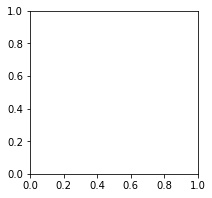

In [30]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

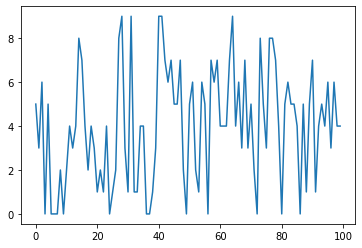

In [31]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

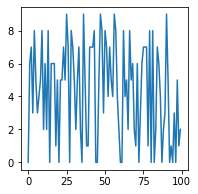

In [32]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

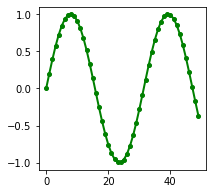

In [33]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

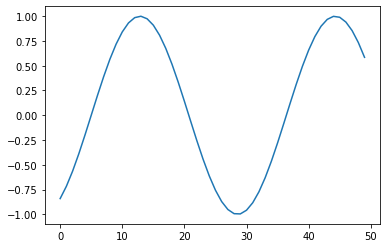

In [34]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No handles with labels found to put in legend.


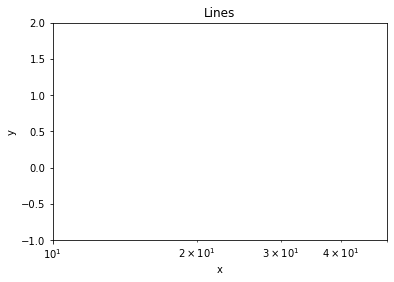

In [36]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best') /ax.legend

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

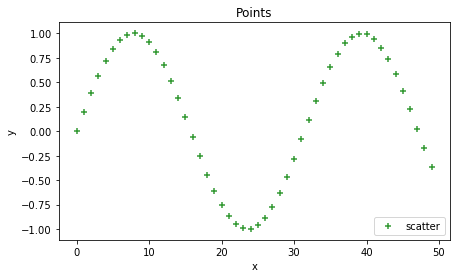

In [37]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

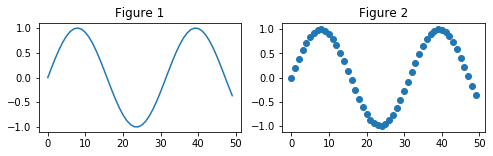

In [38]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

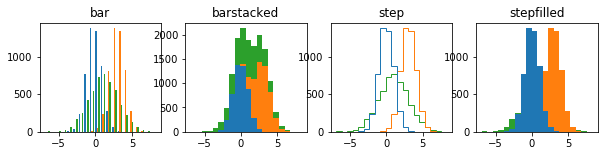

In [39]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

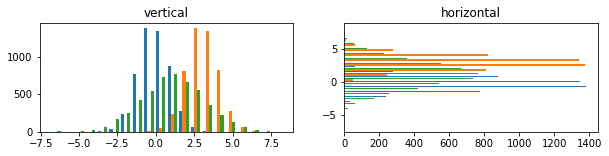

In [40]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [41]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.538184,0.471685,0.886781,0.353888,0.061949,0.146492,0.701728,0.740350,0.701126,0.730681
1,0.919504,0.892027,0.541870,0.608901,0.298929,0.234327,0.082339,0.483245,0.986889,0.539249
2,0.773659,0.091785,0.613799,0.303796,0.708362,0.989624,0.444563,0.362393,0.556557,0.615301
3,0.116358,0.400684,0.975081,0.516501,0.565804,0.077039,0.903999,0.551629,0.429701,0.416853
4,0.777391,0.464249,0.413600,0.417271,0.518225,0.065489,0.831671,0.903818,0.506367,0.958443


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

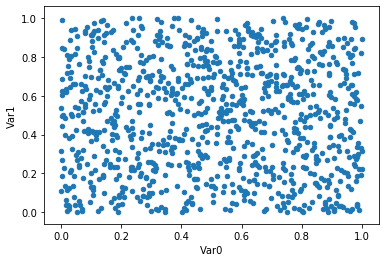

In [44]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

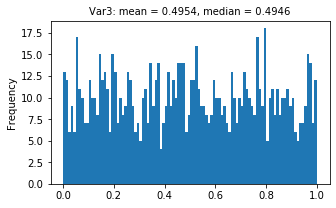

In [45]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

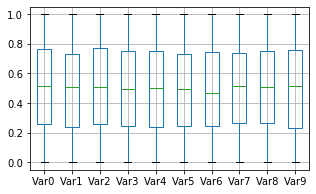

In [46]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

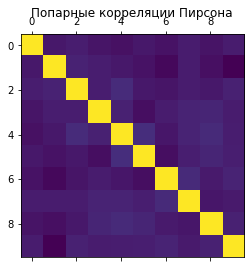

In [47]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

**1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.**

**2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.**

**3. Определите медианы и стандартные отклонения для всех колонок.**

**4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).**

**5. Постройте boxplot для любых 10 колонок.**

**6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.**

**7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.**

**8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).**

**9. Сделайте вывод о скоррелированности этих случайных величин.**

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")